In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [4]:
mall_dataset = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ML\Mall_Customers.csv")
mall_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


                                             |          | [  0%]   00:00 -> (? left)


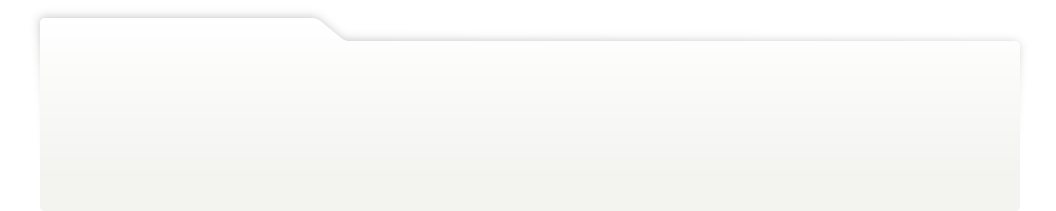
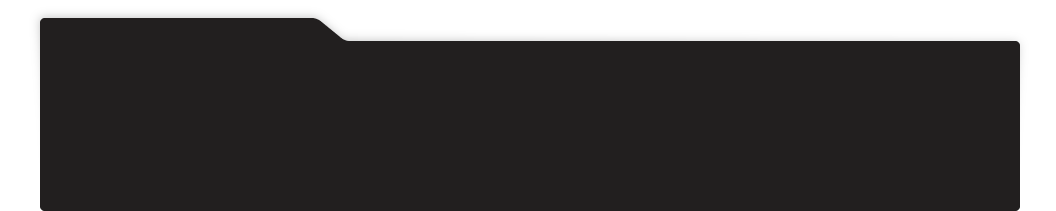
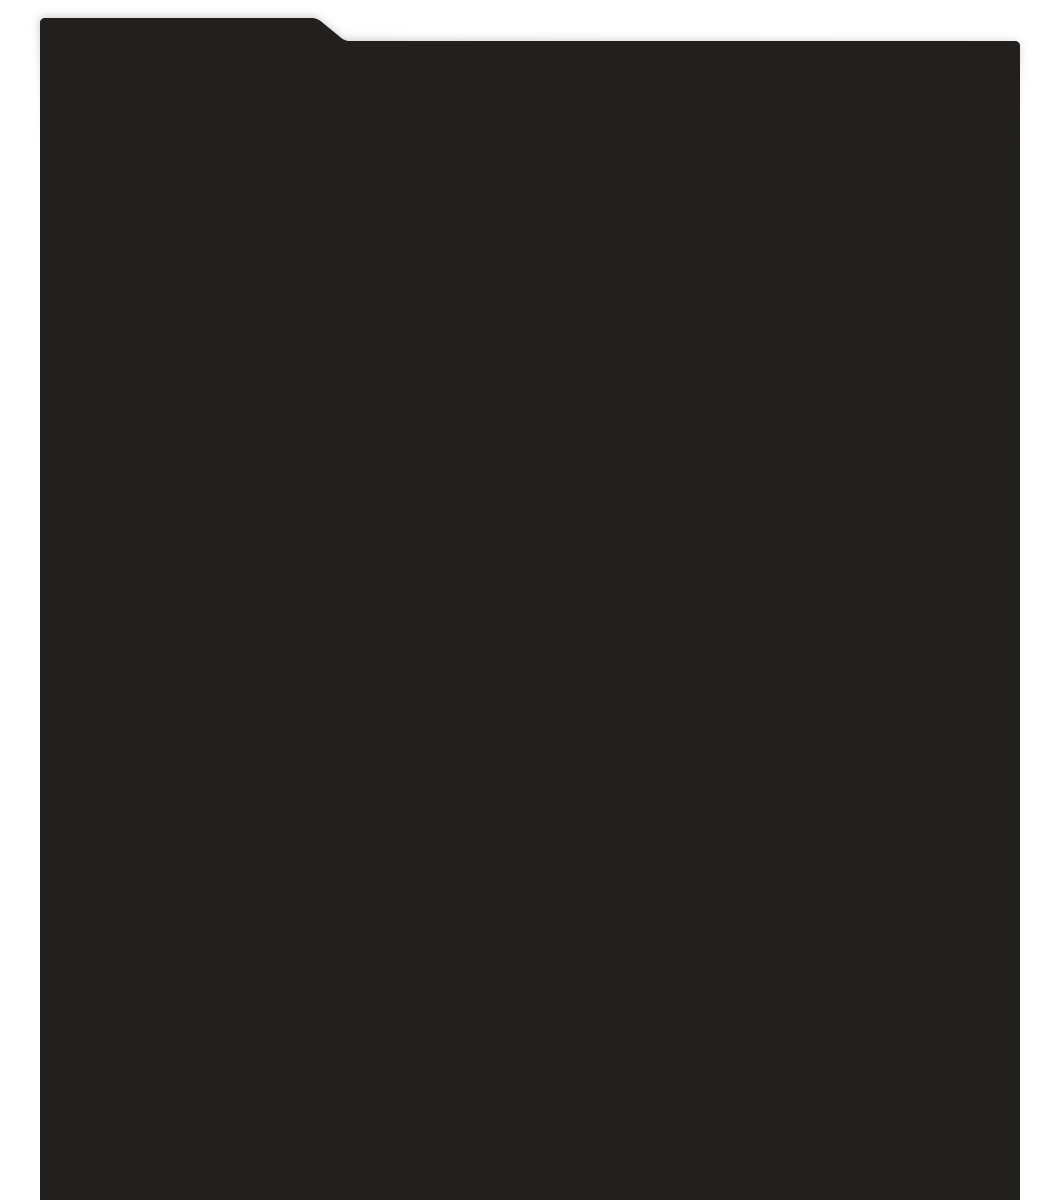
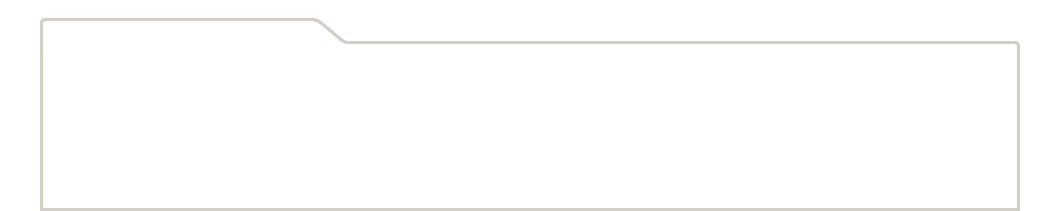
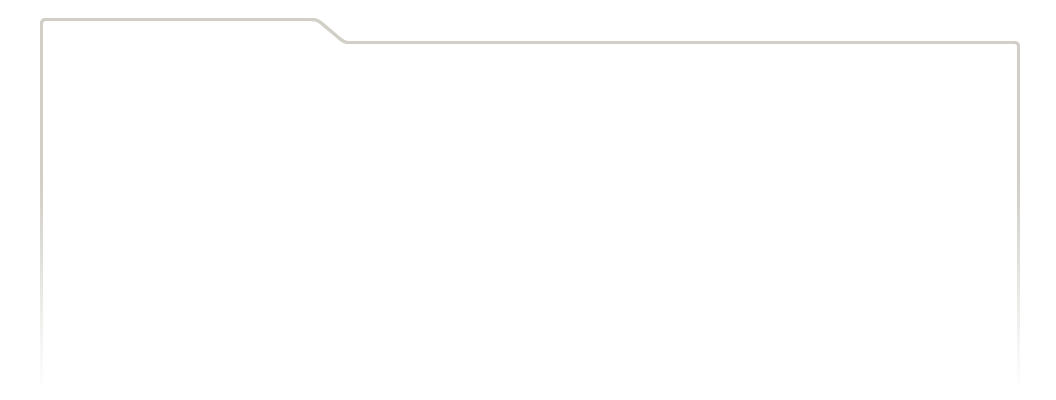
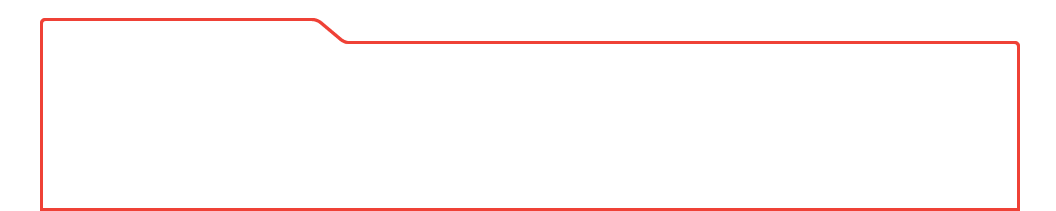
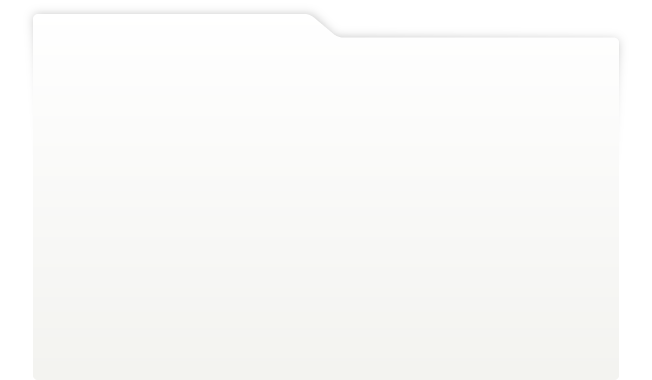
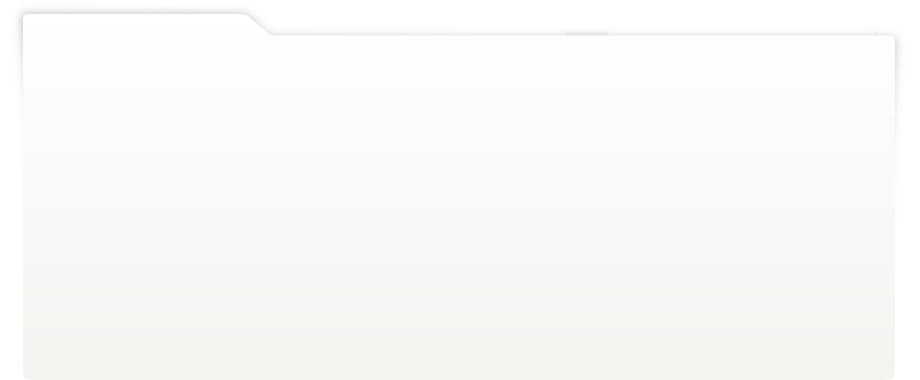
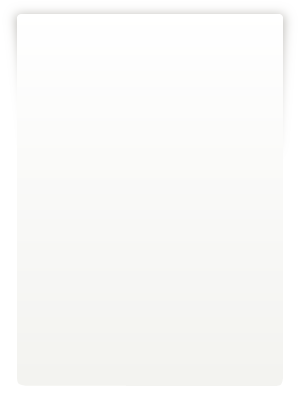
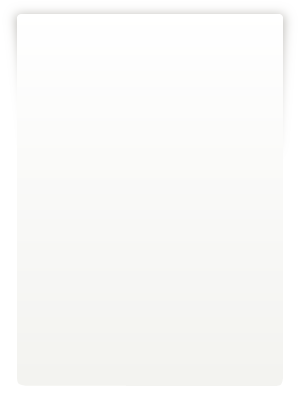
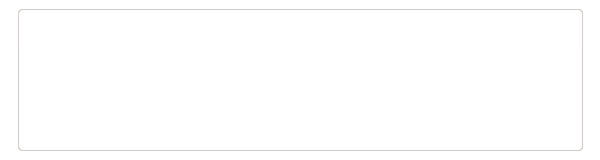
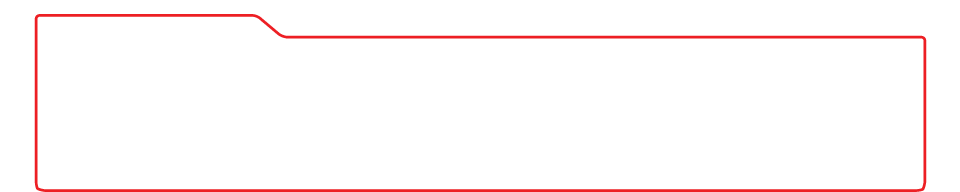
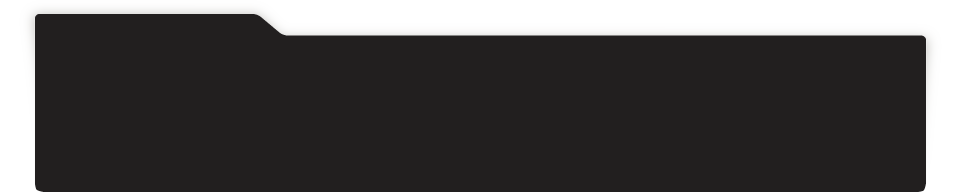
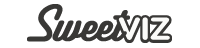
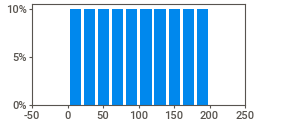
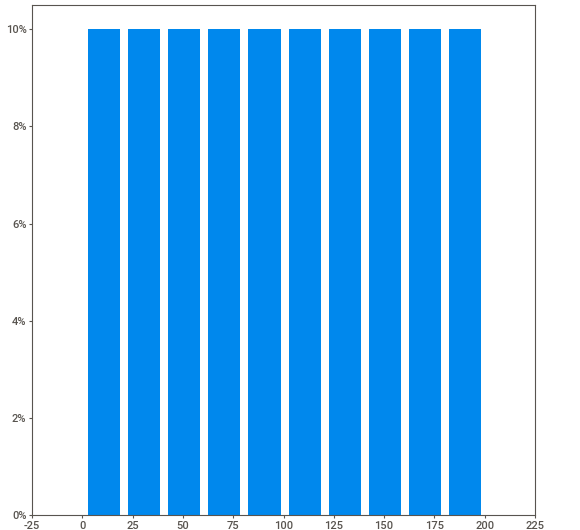
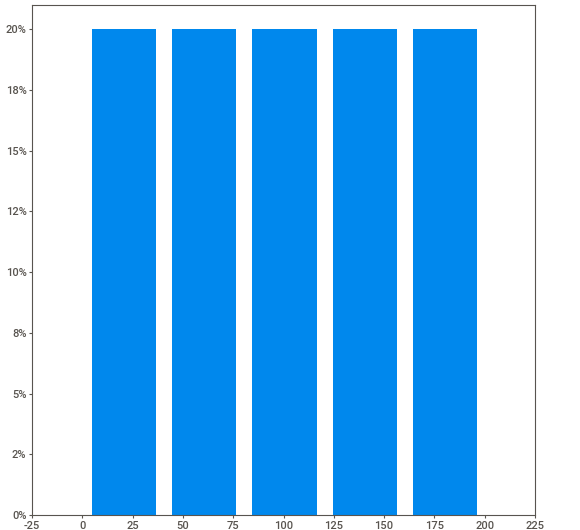
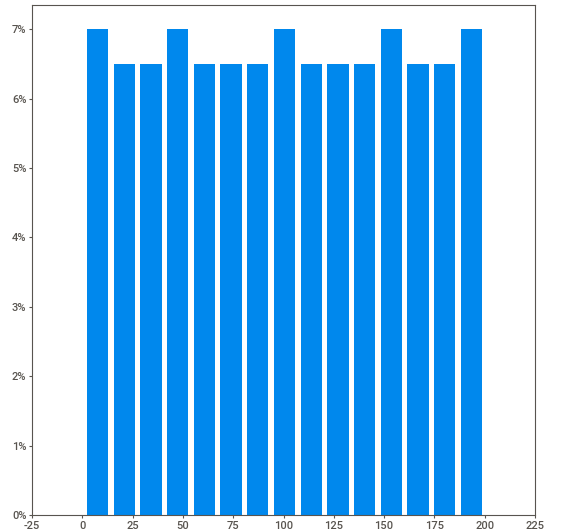
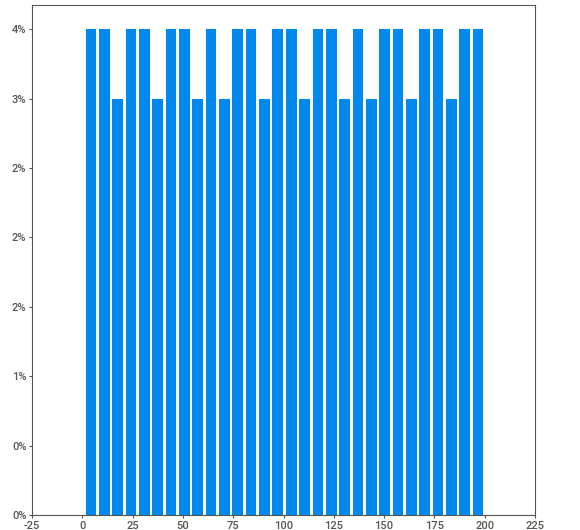
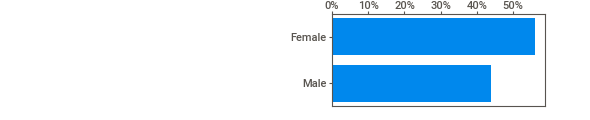
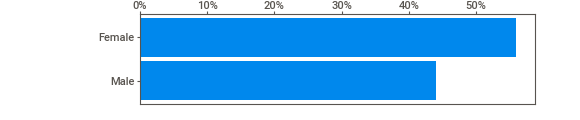
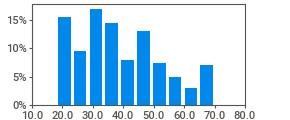
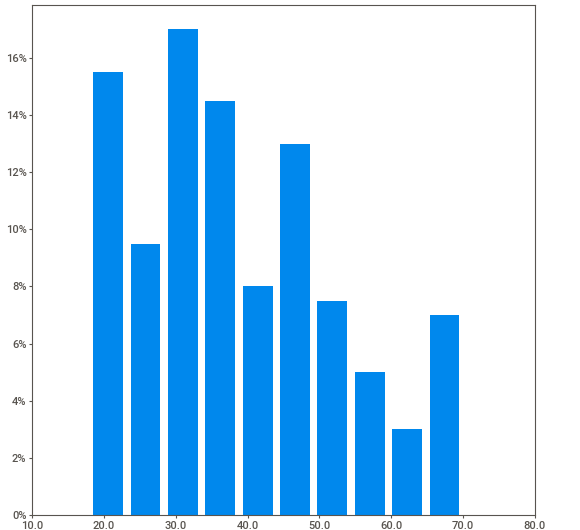
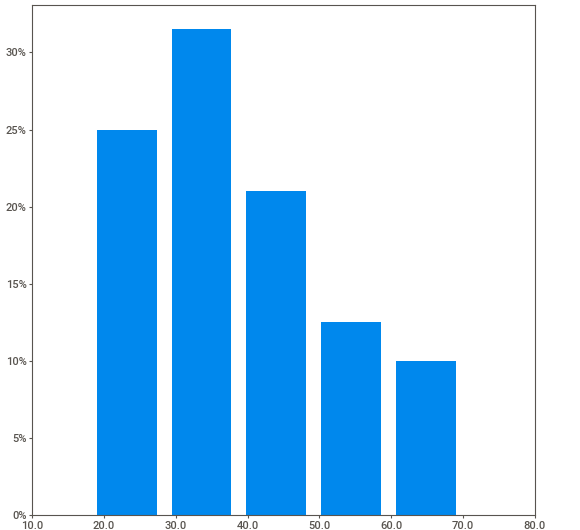
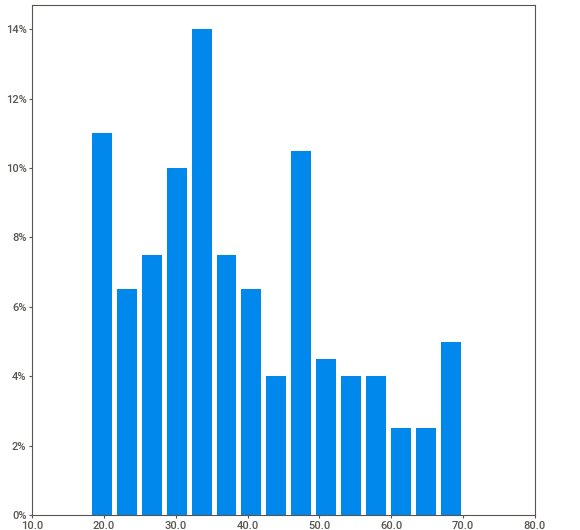
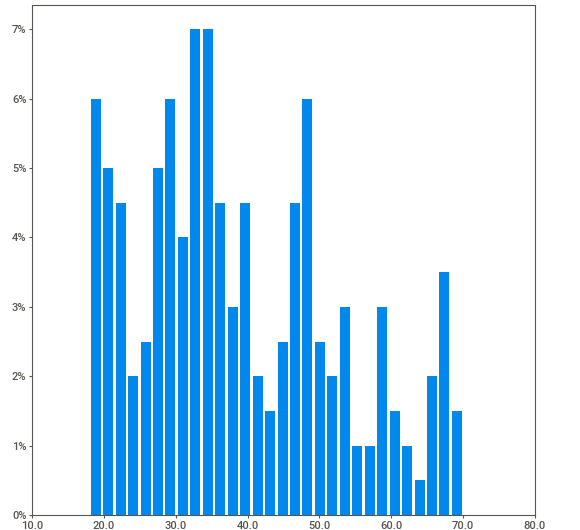
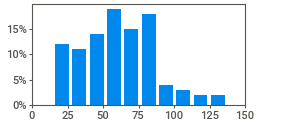
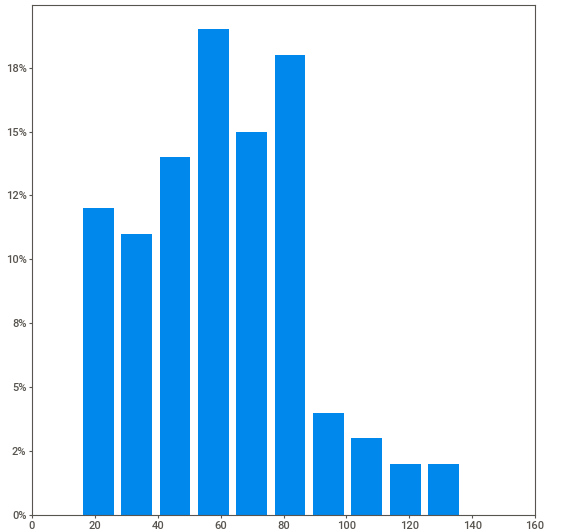
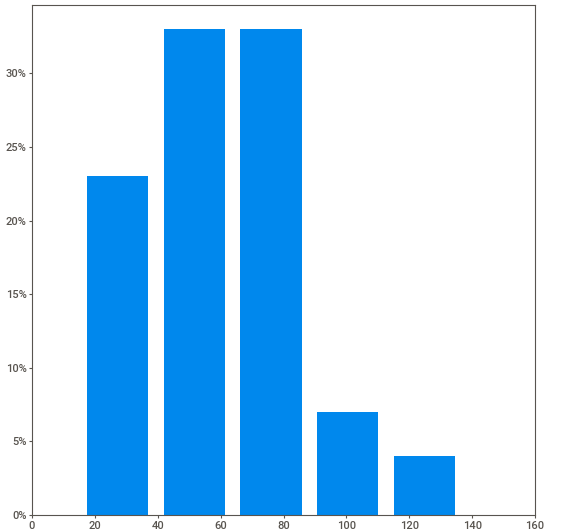
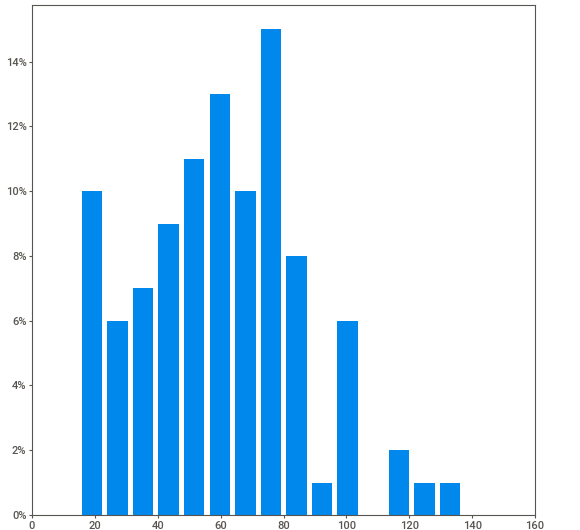
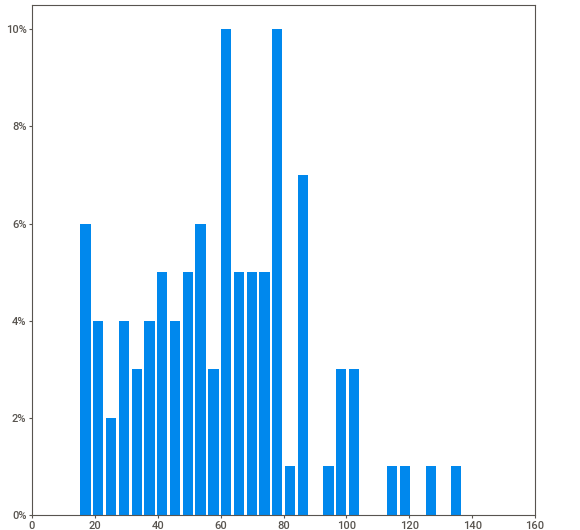
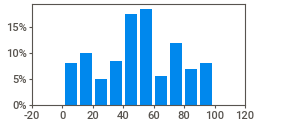
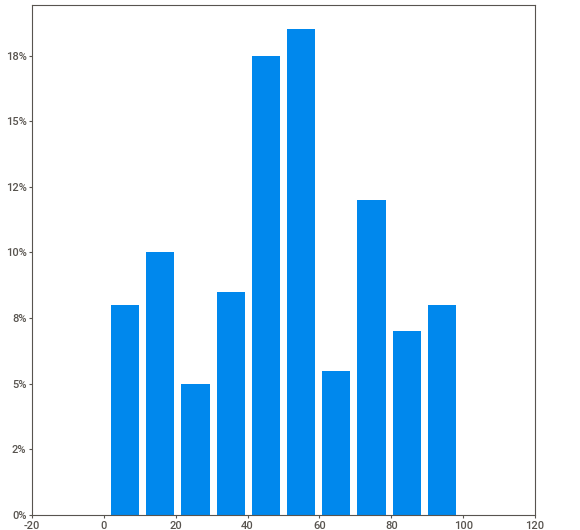
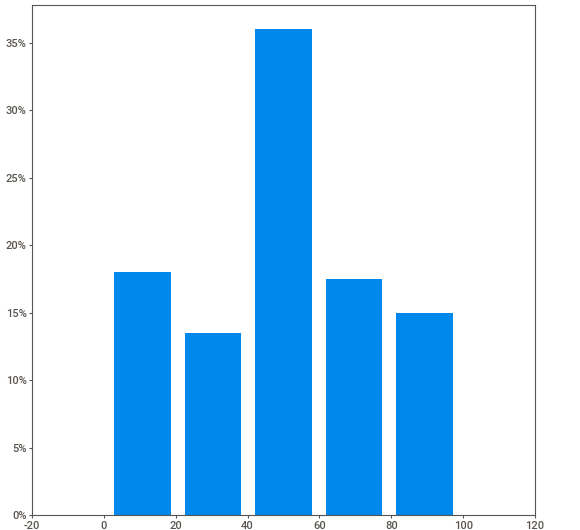
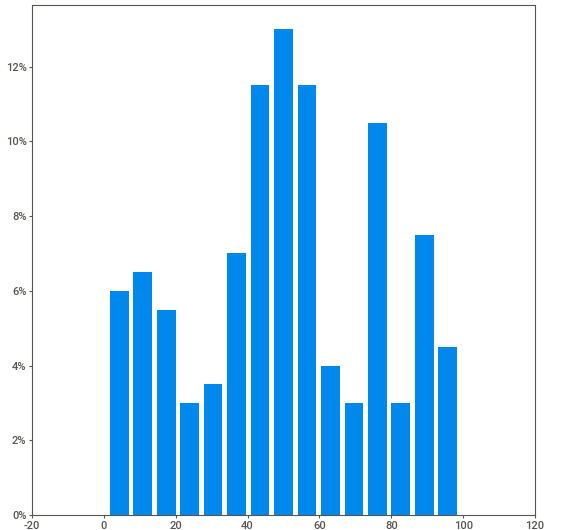
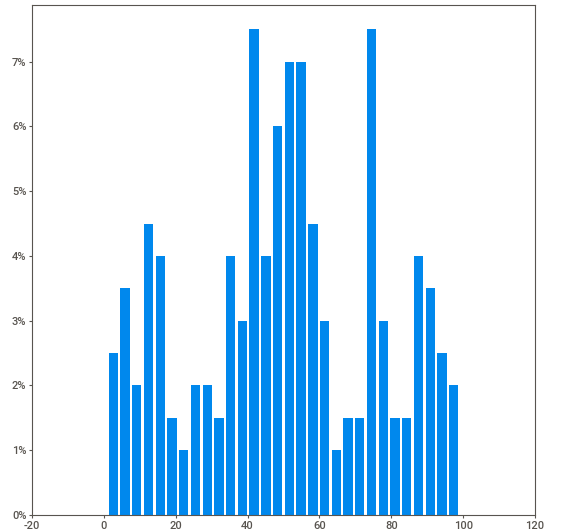
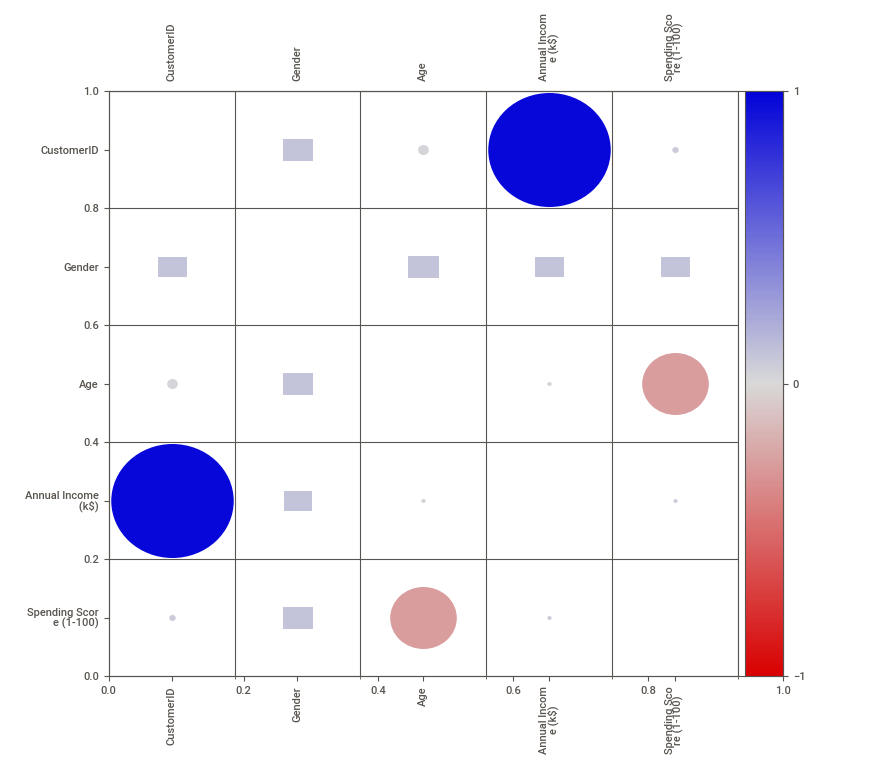
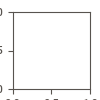

In [5]:

import sweetviz as sv
report = sv.analyze(mall_dataset).show_notebook()

In [6]:
label_encoder= preprocessing.LabelEncoder()
mall_dataset['Gender']=label_encoder.fit_transform(mall_dataset['Gender'])
mall_dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


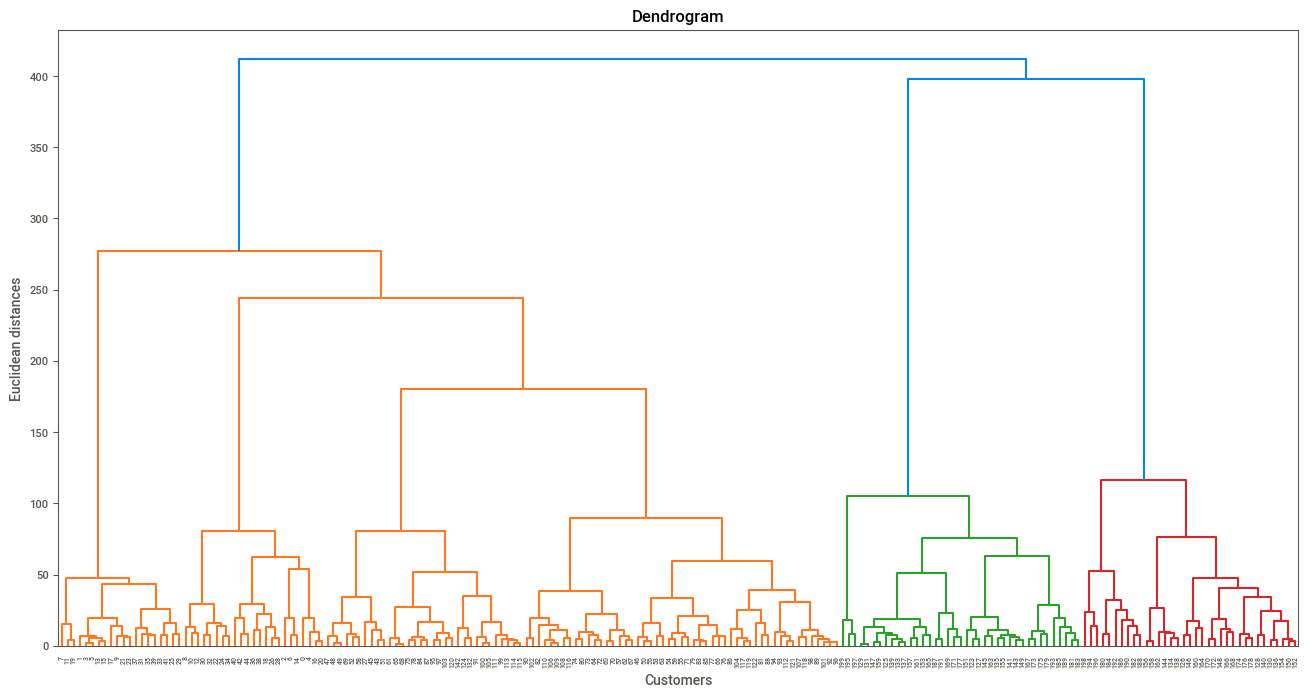

In [8]:
X = mall_dataset.drop(['CustomerID'], axis=1)
plt.figure(1,figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [12]:
## drop CustomerID to get the input data for clustering
X = mall_dataset.drop(['CustomerID'], axis=1)

## Instantiate Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters =5 ,metric='euclidean' ,linkage ='ward')

## Fit and predict the cluster for each data point
mall_dataset["cluster"] = agg_cluster.fit_predict(X)
mall_dataset["cluster"].head()

0    4
1    3
2    4
3    3
4    4
Name: cluster, dtype: int64

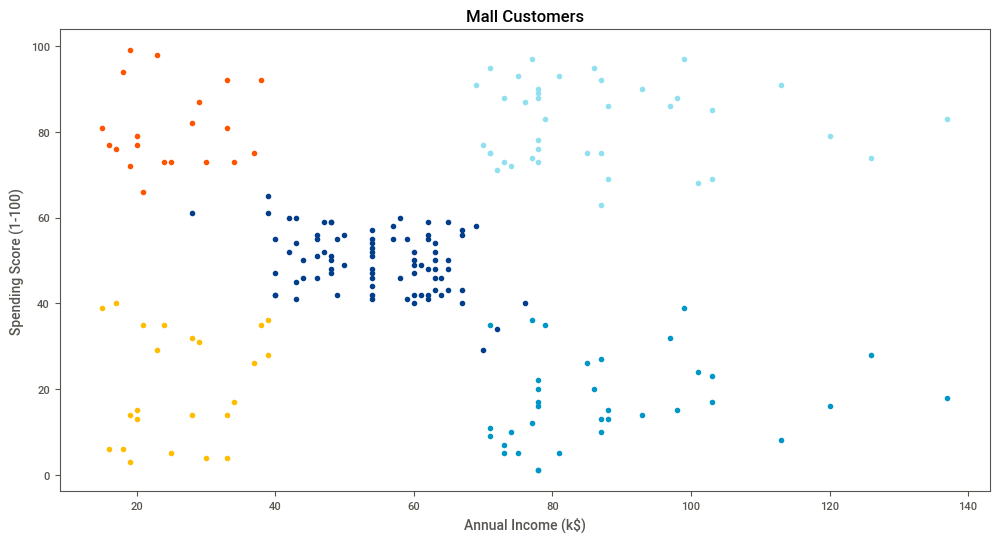

In [13]:
fig = plt.figure(figsize=(12,6))

colors = ["#023e8a", "#0096c7","#90e0ef","#ff5400","#ffbd00", '#000000']

for r in range(5):
    clustered_customer = mall_dataset[mall_dataset["cluster"] == r]
    plt.scatter(clustered_customer["Annual Income (k$)"], clustered_customer["Spending Score (1-100)"], color=colors[r])
    
plt.title("Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()